In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'svg'
import seaborn as sns

In [87]:
import numpy as np
import matplotlib.pyplot as plt

class Airnorm:
    def __init__(self, name: str, x_coord, y_coord):
        # Ensure inputs are numpy arrays
        self.name = name
        self.x = np.array(x_coord)
        self.y = np.array(y_coord)

        # Basic checks
        assert not np.isnan(self.x).any(), "x coordinates contain NaNs"
        assert not np.isnan(self.y).any(), "y coordinates contain NaNs"
        assert len(self.x) == len(self.y), "x and y must have same number of points"

    def display_info(self):
        print(f"Airfoil name: {self.name}, Number of points: {len(self.x)}")

    def normalize(self):
        """Normalize x coordinates from 0 to 1, and center y about 0"""
        x_min = np.min(self.x)
        x_max = np.max(self.x)
        self.x = (self.x - x_min) / (x_max - x_min)
        self.y = self.y - np.mean(self.y)
        return self 
    

    def sort(self):
        """Greedy KNN-like sort to reorder the airfoil coordinates"""
        coords = np.column_stack((self.x, self.y))
        sorted_coords = [coords[0]]
        used = set([0])

        for _ in range(1, len(coords)):
            last = sorted_coords[-1]
            dists = np.linalg.norm(coords - last, axis=1)
            for i in np.argsort(dists):
                if i not in used:
                    sorted_coords.append(coords[i])
                    used.add(i)
                    break
        return self 

        sorted_coords = np.array(sorted_coords)
        self.x, self.y = sorted_coords[:, 0], sorted_coords[:, 1]

    def plot(self):
        plt.scatter(self.x, self.y, linewidth=1.2, marker='o',s = 2.0, label=f"{self.name}")
        plt.xlabel("x coordinates")
        plt.ylabel("y coordinates")
        plt.grid(color = 'mediumseagreen', linestyle = '--', linewidth = 0.4)
        plt.legend()
        plt.title(f"Line plot of {self.name} airfoil")
        plt.axis("equal")
        plt.show()


In [88]:
Data = pd.read_excel(r'C:\Users\Mo\Airnorm\optimized_Naca4415.xlsx'  ).to_numpy()

In [89]:
Naca4415 = Airnorm('Naca4415',Data[:,0],Data[:,1])

In [90]:
Airnorm.display_info(Naca4415)

Airfoil name: Naca4415, Number of points: 238


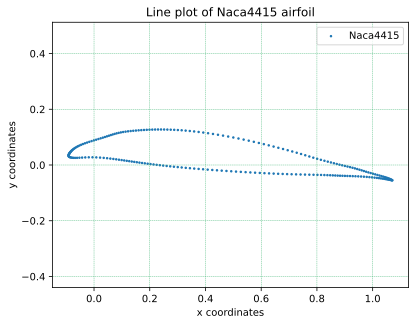

In [91]:
Naca4415.plot()

In [92]:
Naca4415_norm_sort = Airnorm("Normalized", Data[:,0],Data[:,1]).normalize().sort()

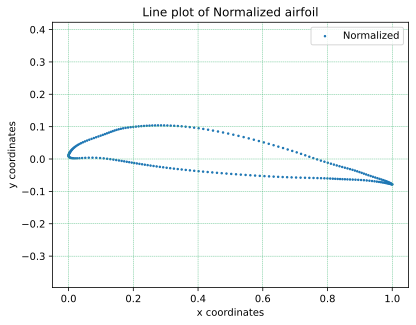

In [93]:
Naca4415_norm_sort.plot()
